In [1]:
from scipy import signal
from numpy import *
from sns import *

# some settings for better plotting
plt.rcParams['figure.figsize'] = [12, 6]

![](1a.png)

[1.   0.6  0.36 0.22 0.13 0.08 0.05 0.03 0.02]


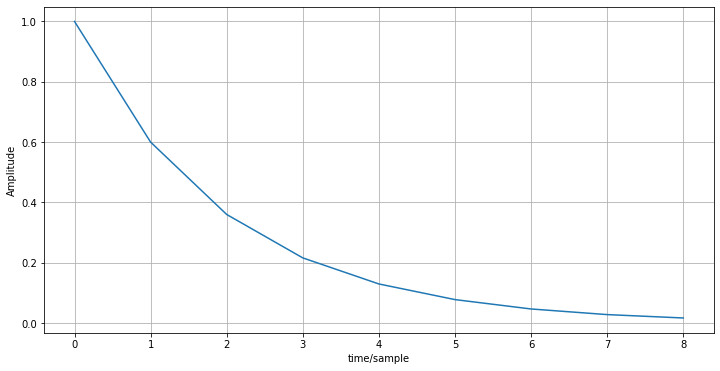

In [6]:
output=[1.0000, 1.4660, 1.3796, 0.8278, -0.0033, -0.8680, -1.5208, -1.7785, -1.5671, -0.9503, -0.5789, -0.3524,
        -0.2114, -0.1218, -0.0644, -0.0285, -0.0084]
# ok, output is convoluted, en we zoeken naar een input die samen met cos(1/6 pi t) is geconvoluted
# dus we gaan deconvolution gebruiken. Verder weten we dat de output een len van 9 moet hebben
T = 1
t = arange(0, 9, T)

ft = cos(pi / 6 * t)
gt, remainder = signal.deconvolve(output, ft)
#not needed
# tmax = 2 * len(t) - 1
# new_t = arange(0, tmax) * T
print(around(gt, 2))
plot(t, gt)

![](1b.png)

[1.   0.6  0.36 0.22 0.13 0.08 0.05 0.03 0.02]


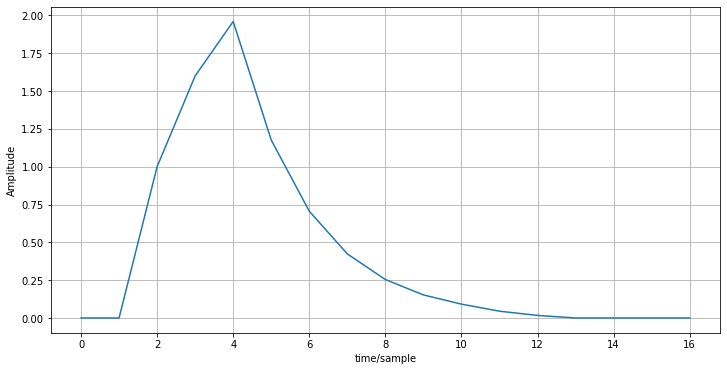

In [7]:
# dus nu willen we gt convolven met deze functie
ht = stepfunction(t-1) - stepfunction(t-4)
gh_t = convolve(gt, ht)
maxt = len(gt) + len(ht) - 1 # convolve returnt een array met n elements, where n = n sign1 + n sign2 - 1
new_t = arange(0, maxt, 1) * T

print(around(gt, 2))
plot(new_t, gh_t)